### 1. Import bibliotek
#### 🇬🇧 Import libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib as plt
import os
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

### 2. Przygotowanie danych do analizy
#### 🇬🇧 Data preparation

In [ ]:
# Anaconda
#os.getcwd()
#base_data = pd.read_csv("DSP_1.csv")

# Google Colab
from google.colab import drive
drive.mount('/content/drive')
os.chdir('/content/drive/My Drive/PUM06')
base_data = pd.read_csv("DSP_1.csv")

Mounted at /content/drive


In [ ]:
base_data.columns
# na tym etapie tworzymy nową zmienną, którą nazywamy base_data, zawierającą nasz zbiór danych

cols = ["Survived", "Pclass", "Sex", "Age", "SibSp", "Parch", "Fare", "Embarked"]
data = base_data[cols].copy()
# tworzymy kopię naszych danych bez zbędnych kolumn (np. PassengerID i Name)

In [ ]:
data.isnull().any()
# sprawdzamy czy mamy jakiekolwiek brakujące dane

Survived    False
Pclass      False
Sex         False
Age          True
SibSp       False
Parch       False
Fare        False
Embarked     True
dtype: bool

In [ ]:
data["Age"].fillna((data["Age"].mean()), inplace=True) # wypełni nam brakujące informacje średnią
data.dropna(subset=['Embarked'], inplace=True)

In [ ]:
data.isnull().any()

Survived    False
Pclass      False
Sex         False
Age         False
SibSp       False
Parch       False
Fare        False
Embarked    False
dtype: bool

In [ ]:
encoder = LabelEncoder()
data.loc[:,"Sex"] = encoder.fit_transform(data.loc[:,"Sex"])
data.loc[:,"Embarked"] = encoder.fit_transform(data.loc[:,"Embarked"])

### 3. Eksploracja danych
#### 🇬🇧 Data exploration

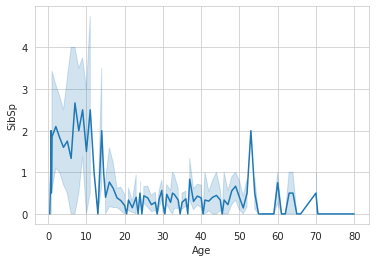

In [ ]:
sns.set_style('whitegrid')

sns.lineplot(x='Age', y="SibSp", data=data)

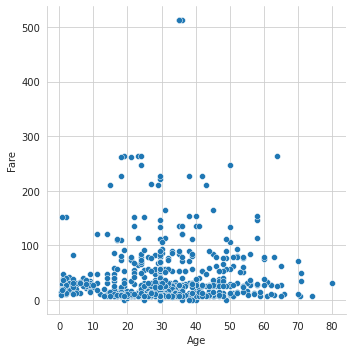

In [ ]:
sns.relplot(x='Age',y='Fare',data=data)
# możemy też wygenerować taki wykres, który powie nam więcej o płci osób, które nie przeżyły

### 4. Trenowanie modelu
#### 🇬🇧 Model training

In [ ]:
y = data.iloc[:,0] # survived - zmienna, którą będziemy chcieli przewidzieć
x = data.iloc[:,1:8] # zmienne na podstawie, których chcemy przewidzieć
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)
# test size odnosi się do liczby obserwacji przeznaczonej do wytrenowania modelu

In [ ]:
def model(X_train, y_train):

    forest = RandomForestClassifier (n_estimators=20, random_state=0)
    forest.fit(X_train,y_train)
    print("Random Forest: {0}".format(forest.score(X_train,y_train)))

    lreg = LogisticRegression(max_iter = 1000) # tworzymy regresję logistyczną znaną z poprzednich zajęć
    lreg.fit(X_train,y_train)
    print("Regresja logistyczna: {0}".format(lreg.score(X_train,y_train)))

    tree = DecisionTreeClassifier()
    tree.fit(X_train,y_train)
    print("Decision Tree: {0}".format(tree.score(X_train,y_train)))

    return forest, lreg, tree

forest, lreg, tree = model(X_train,y_train)

Random Forest: 0.980309423347398
Regresja logistyczna: 0.8213783403656821
Decision Tree: 0.9845288326300985


In [ ]:
y1_predict = forest.predict(X_test)
print("Random Forest {0}".format(accuracy_score(y_test, y1_predict)))

y2_predict = lreg.predict(X_test)
print("Logistic Regresion {0}".format(accuracy_score(y_test, y2_predict)))

y3_predict = tree.predict(X_test)
print("Decision Tree {0}".format(accuracy_score(y_test, y3_predict)))

# uzyskujemy dzięki temu informacje dotyczącą dokładności modelu

Random Forest 0.7640449438202247
Logistic Regresion 0.7134831460674157
Decision Tree 0.7696629213483146


In [ ]:
print("Ocena modelu 1. Random Forest")
print(classification_report(y_test,y1_predict))

print("Ocena modelu 2. Regresja logistyczna")
print(classification_report(y_test,y2_predict))

print("Ocena modelu 3. Decision Tree")
print(classification_report(y_test,y3_predict))

# uzyskujemy informację o precyzji, recall, f1, etc.
# te wszystkie dane przydadzą się nam do oceny naszego modelu

Ocena modelu 1. Random Forest
              precision    recall  f1-score   support

           0       0.77      0.86      0.81       105
           1       0.75      0.63      0.69        73

    accuracy                           0.76       178
   macro avg       0.76      0.74      0.75       178
weighted avg       0.76      0.76      0.76       178

Ocena modelu 2. Regresja logistyczna
              precision    recall  f1-score   support

           0       0.74      0.80      0.77       105
           1       0.67      0.59      0.63        73

    accuracy                           0.71       178
   macro avg       0.70      0.69      0.70       178
weighted avg       0.71      0.71      0.71       178

Ocena modelu 3. Decision Tree
              precision    recall  f1-score   support

           0       0.78      0.86      0.81       105
           1       0.76      0.64      0.70        73

    accuracy                           0.77       178
   macro avg       0.77      0.

### 5. Eksport modelu
#### 🇬🇧 Model export

In [ ]:
filename = "model.sv"
pickle.dump(forest, open(filename,'wb'))
# Widzimy, że dobrymi parametrami cechuje się model pierwszy - eksportujemy go do pickle

Możemy się jeszcze chwilę "pobawić" i sprawdzić czy np. osoba z klasy pasażerskiej 1, będąca mężczyzną w wieku 50 lat, nieposiadająca innych członków rodziny, itd. przeżyłaby podróż. Odczytujemy wynik i widzimy, że niestety nie przeżyłaby podróży. Do porównania drugi przykład (kobieta w wieku 20 lat) - model podpowiada nam, że ta osoba przeżyłaby podróż.

In [ ]:
my_data =[
            [
             1,  #"Pclass"
             1,  #"Sex", Sex 0 = Female, 1 = Male
             50,  #"Age", Age
             0,  #"SibSp"
             0,  #"Parch"
             0,  #"Fare",
             2,  #"Embarked"
    ]
]

forest.predict(my_data)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  "X does not have valid feature names, but"


array([0])

### Nowy zbiór danych

##### 🇬🇧 New dataset

In [ ]:
base_data2 = pd.read_csv("DSP_2.csv")
base_data2.columns

Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope',
       'HeartDisease'],
      dtype='object')

In [ ]:
cols2 = ["Age", "Sex", "ChestPainType", "RestingBP", "Cholesterol", "FastingBS", "RestingECG", "MaxHR", "ExerciseAngina", "Oldpeak", "ST_Slope", "HeartDisease"]
data2 = base_data2[cols2].copy()

In [ ]:
data2.isnull().any()

Age               False
Sex               False
ChestPainType     False
RestingBP         False
Cholesterol       False
FastingBS         False
RestingECG        False
MaxHR             False
ExerciseAngina    False
Oldpeak           False
ST_Slope          False
HeartDisease      False
dtype: bool

In [ ]:
data2

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


In [ ]:
data2.loc[:,"Sex"] = encoder.fit_transform(data2.loc[:,"Sex"])
data2.loc[:,"ChestPainType"] = encoder.fit_transform(data2.loc[:,"ChestPainType"])
data2.loc[:,"RestingECG"] = encoder.fit_transform(data2.loc[:,"RestingECG"])
data2.loc[:,"ExerciseAngina"] = encoder.fit_transform(data2.loc[:,"ExerciseAngina"])
data2.loc[:,"ST_Slope"] = encoder.fit_transform(data2.loc[:,"ST_Slope"])

data2

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,1,1,140,289,0,1,172,0,0.0,2,0
1,49,0,2,160,180,0,1,156,0,1.0,1,1
2,37,1,1,130,283,0,2,98,0,0.0,2,0
3,48,0,0,138,214,0,1,108,1,1.5,1,1
4,54,1,2,150,195,0,1,122,0,0.0,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,1,3,110,264,0,1,132,0,1.2,1,1
914,68,1,0,144,193,1,1,141,0,3.4,1,1
915,57,1,0,130,131,0,1,115,1,1.2,1,1
916,57,0,1,130,236,0,0,174,0,0.0,1,1


In [ ]:
y2 = data2.iloc[:,-1] # survived - zmienna, którą będziemy chcieli przewidzieć
x2 = data2.iloc[:,0:11] # zmienne na podstawie, których chcemy przewidzieć
X2_train, X2_test, y2_train, y2_test = train_test_split(x2, y2, test_size = 0.2, random_state = 0)

In [ ]:
forest2, lreg2, tree2 = model(X2_train,y2_train)

Random Forest: 1.0
Regresja logistyczna: 0.8596730245231607
Decision Tree: 1.0


In [ ]:
y4_predict = forest2.predict(X2_test)
print("Random Forest {0}".format(accuracy_score(y2_test, y4_predict)))

y5_predict = lreg2.predict(X2_test)
print("Logistic Regresion {0}".format(accuracy_score(y2_test, y5_predict)))

y6_predict = tree2.predict(X2_test)
print("Decision Tree {0}".format(accuracy_score(y2_test, y6_predict)))

Random Forest 0.8586956521739131
Logistic Regresion 0.8369565217391305
Decision Tree 0.7717391304347826


In [ ]:
print("Ocena modelu 1. Random Forest")
print(classification_report(y2_test,y4_predict))

print("Ocena modelu 2. Regresja logistyczna")
print(classification_report(y2_test,y5_predict))

print("Ocena modelu 3. Decision Tree")
print(classification_report(y2_test,y6_predict))

Ocena modelu 1. Random Forest
              precision    recall  f1-score   support

           0       0.84      0.82      0.83        77
           1       0.87      0.89      0.88       107

    accuracy                           0.86       184
   macro avg       0.86      0.85      0.85       184
weighted avg       0.86      0.86      0.86       184

Ocena modelu 2. Regresja logistyczna
              precision    recall  f1-score   support

           0       0.83      0.77      0.80        77
           1       0.84      0.89      0.86       107

    accuracy                           0.84       184
   macro avg       0.84      0.83      0.83       184
weighted avg       0.84      0.84      0.84       184

Ocena modelu 3. Decision Tree
              precision    recall  f1-score   support

           0       0.69      0.82      0.75        77
           1       0.85      0.74      0.79       107

    accuracy                           0.77       184
   macro avg       0.77      0.

Random Forest cechuje się najlepszymi parametrami dla tego modelu

### Wizualizacja drzew decyzyjnych
##### https://towardsdatascience.com/how-to-visualize-a-decision-tree-from-a-random-forest-in-python-using-scikit-learn-38ad2d75f21c

##### 🇬🇧 Decision Tree Visualisation

In [ ]:
from sklearn.tree import export_graphviz
export_graphviz(tree2, out_file='tree.dot',
                feature_names = cols2[:-1],
                rounded = True, proportion = False,
                precision = 2, filled = True)

from subprocess import call
call(['dot', '-Tpng', 'tree.dot', '-o', 'tree.png', '-Gdpi=600'])

from IPython.display import Image
Image(filename = 'tree.png')